### DSC520: Final Project <br> Michael Hotaling <br> 2020-11-10

### Predicting Hotel Cancellations using Logistic Regression and Decision Trees

In [50]:
library(caTools)
library(psych)
library(ggplot2)
library(rpart)
library(rpart.plot)
library(rattle)

The data is broken up into two different dataframes. H1 contains data from a resort hotel and H2 contains data from a hotel located in a city. The goal of this project will be to build several models to determine whether or not we can predict if customers will cancel their reservations. 

We will also be investigating whether or not a model trained on Resort hotel data will be applicable to City hotel data and vice versa. This would indicate that the model is robust enough to be deployed in several locations

In [51]:
H1 <- read.csv("H1.csv")
H1$Location <- as.factor("Resort")

In [52]:
H2 <- read.csv("H2.csv")
H2$Location <- as.factor("City")

In [53]:
# Data Cleaning

df <- rbind(H1,H2)

df$ReservationStatusDate <- as.Date(df$ReservationStatusDate)
#df$IsCanceled <- as.factor(df$IsCanceled)
df$DayName <- as.factor(as.POSIXlt(df$ReservationStatusDate)$wday + 1)
df$StaysTotalDays <- df$StaysInWeekendNights + df$StaysInWeekNights

levels(df$DayName) <- c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
levels(df$ArrivalDateMonth) <-c("January","Feburary","March","April","May","June","July","August","September","October","November","December")

In [54]:
str(df)

'data.frame':	119390 obs. of  34 variables:
 $ IsCanceled                 : int  0 0 0 0 0 0 0 0 1 1 ...
 $ LeadTime                   : int  342 737 7 13 14 14 0 9 85 75 ...
 $ ArrivalDateYear            : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ ArrivalDateMonth           : Factor w/ 12 levels "January","Feburary",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ ArrivalDateWeekNumber      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ ArrivalDateDayOfMonth      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ StaysInWeekendNights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ StaysInWeekNights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ Adults                     : int  2 2 1 1 2 2 2 2 2 2 ...
 $ Children                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Babies                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Meal                       : Factor w/ 5 levels "BB       ","FB       ",..: 1 1 1 1 1 1 1 2 1 3 ...
 $ Country                    : Factor w/ 178 levels "AGO","ALB","AND",..: 97 97 46 46 46 46 

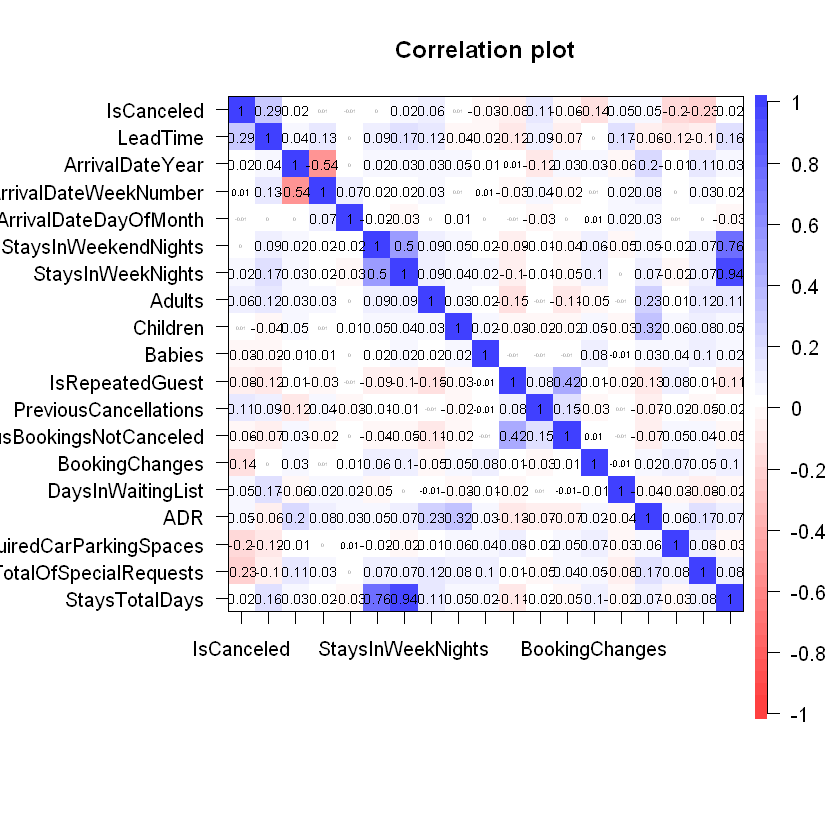

In [59]:
# I should use corr.plot instead

cor.plot(df[ , purrr::map_lgl(df, is.numeric)])

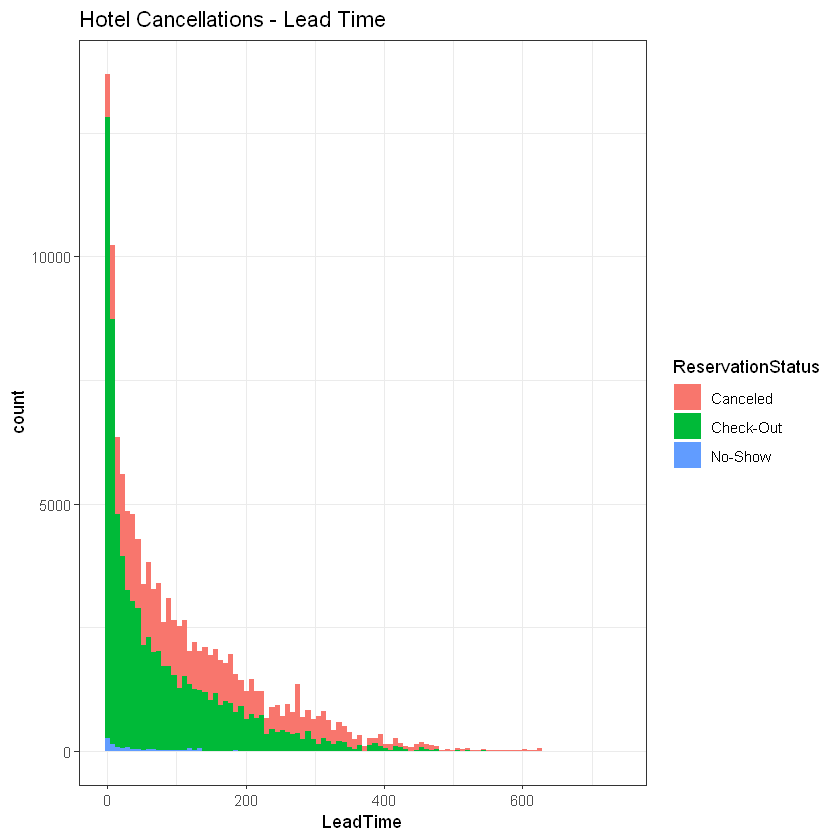

In [60]:
ggplot(data = df, aes(x = LeadTime, fill = ReservationStatus)) + 
geom_histogram(bins = 100) + 
theme_bw() + 
ggtitle("Hotel Cancellations - Lead Time")

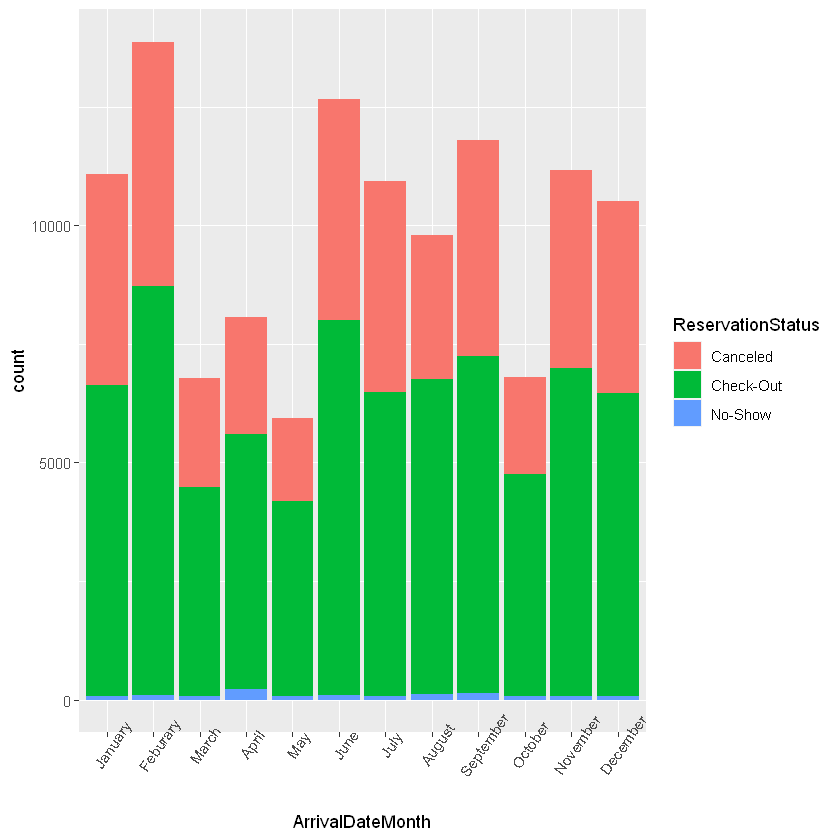

In [61]:
ggplot(data = df, aes(x = ArrivalDateMonth, fill = ReservationStatus )) + 
geom_bar(stat = "count") + 
theme(axis.text.x = element_text(angle = 55))

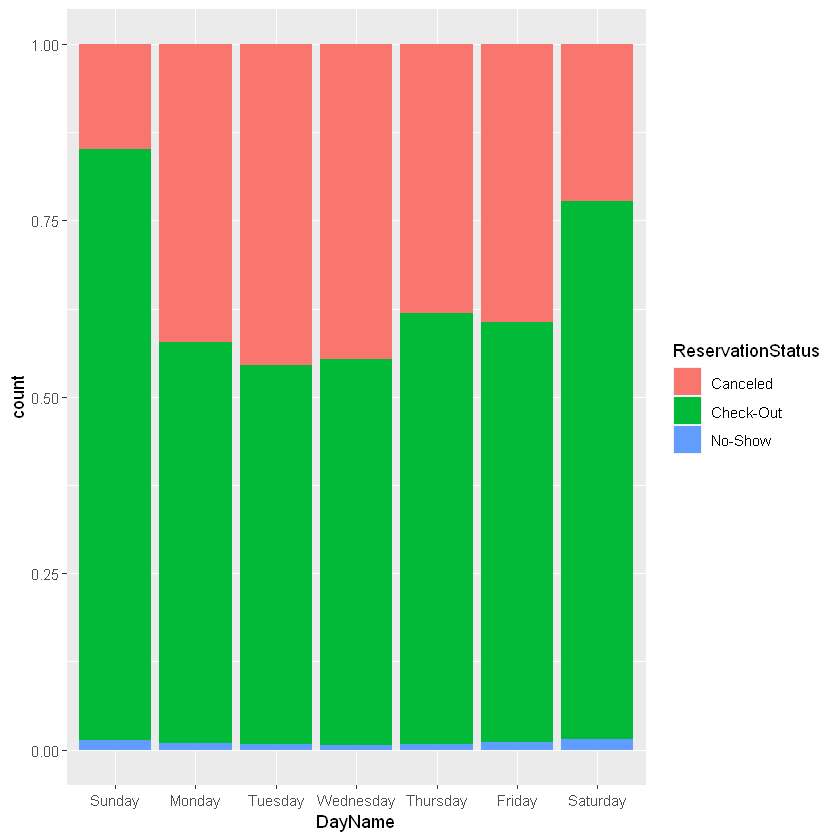

In [62]:
ggplot(data = df, aes(x = DayName, fill = ReservationStatus)) + 
geom_bar(stat = "count", position = "fill") 

Warning message:
"Removed 277 rows containing non-finite values (stat_bin)."Warning message:
"Removed 6 rows containing missing values (geom_bar)."

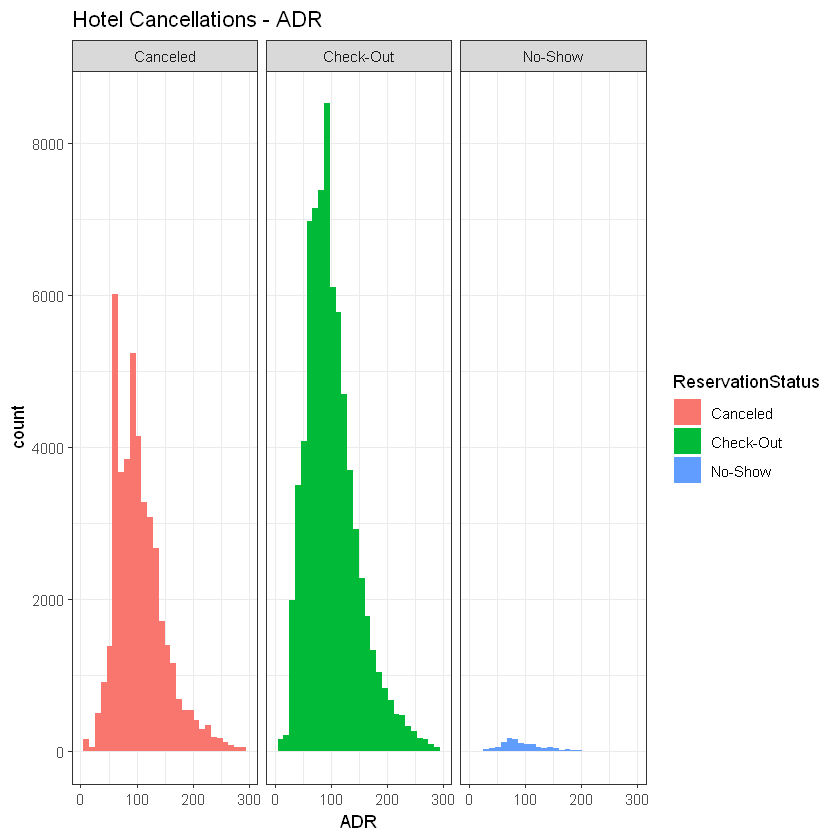

In [63]:
ggplot(data = df, aes(x = ADR, fill = ReservationStatus)) + 
geom_histogram(bins = 30) + 
theme_bw() + 
ggtitle("Hotel Cancellations - ADR") + 
xlim(0,300) + 
facet_wrap(vars(ReservationStatus))

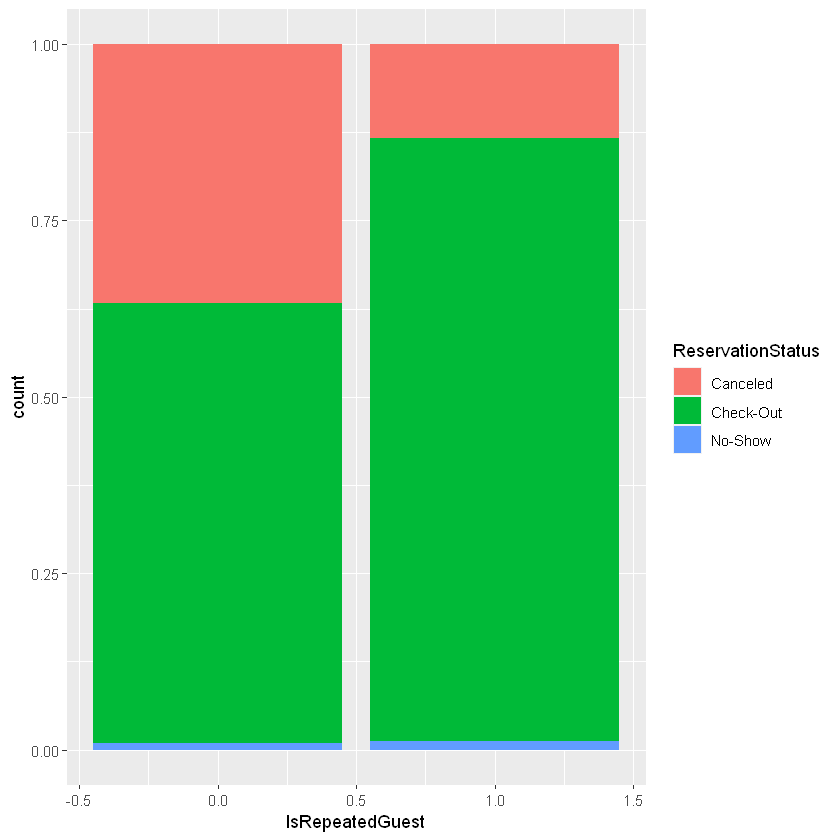

In [64]:
ggplot(data = df, aes(x = IsRepeatedGuest, fill = ReservationStatus)) + 
geom_bar(stat = "count", position = "fill") 

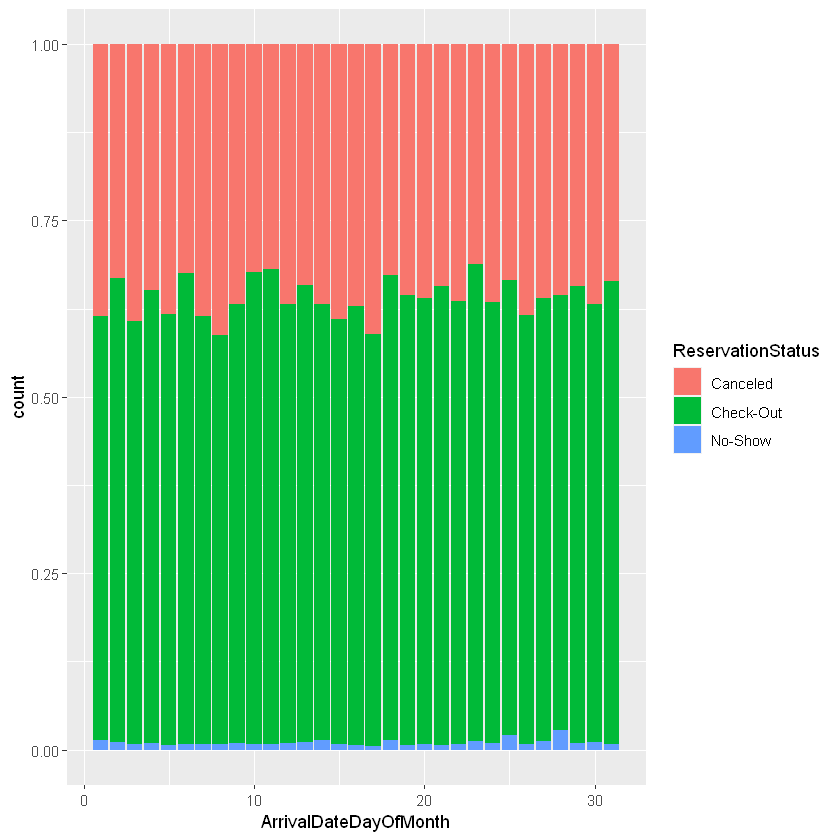

In [78]:
ggplot(data = df, aes(x = ArrivalDateDayOfMonth, fill = ReservationStatus)) + 
geom_bar(stat = "count", position = "fill") 

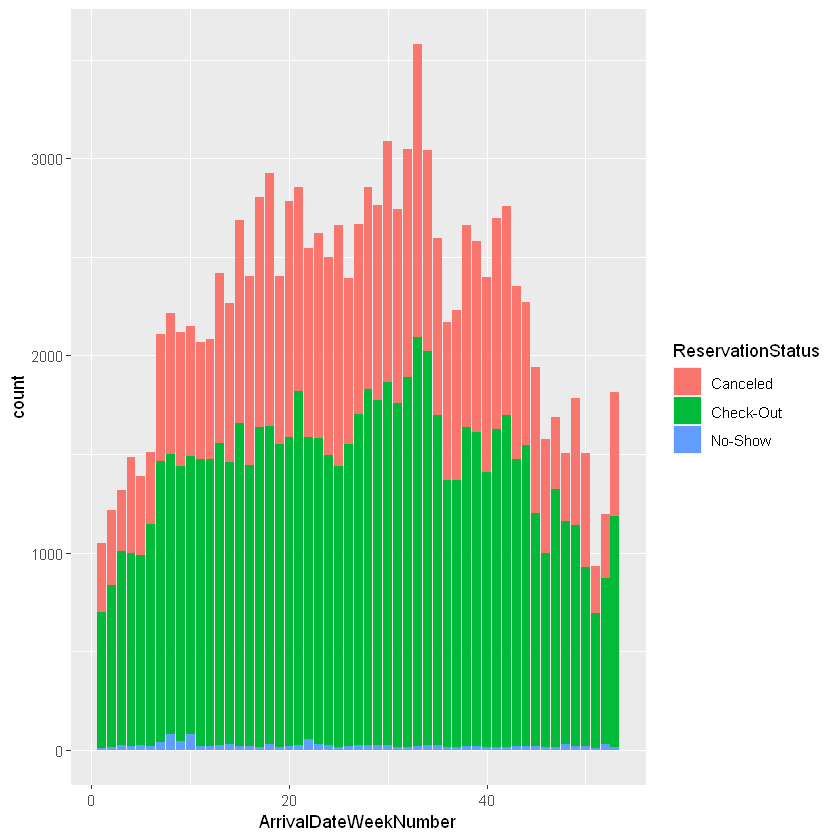

In [83]:
ggplot(data = df, aes(x = ArrivalDateWeekNumber, fill = ReservationStatus)) + 
geom_bar(stat = "count", width = 0.90) 

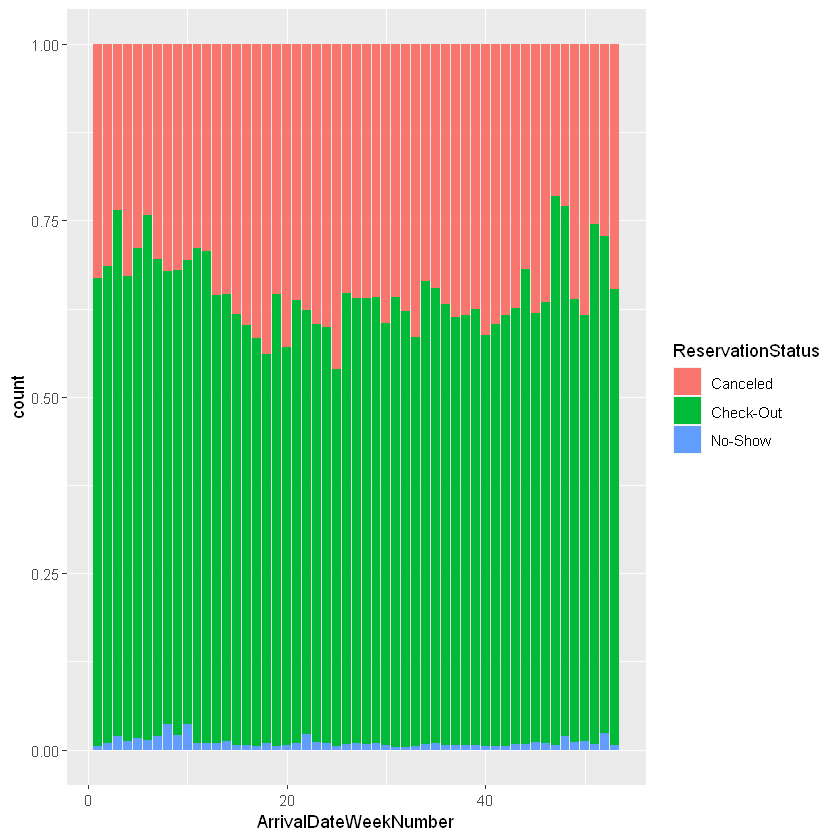

In [82]:
ggplot(data = df, aes(x = ArrivalDateWeekNumber, fill = ReservationStatus)) + 
geom_bar(stat = "count", position = "fill", width = 0.90) 

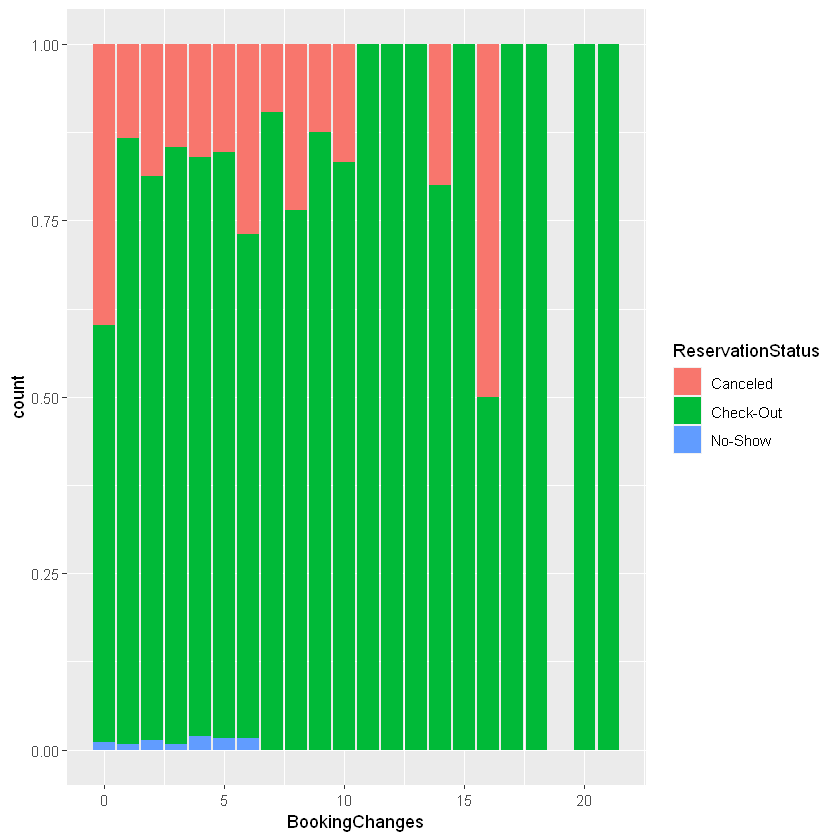

In [66]:
ggplot(data = df, aes(x = BookingChanges, fill = ReservationStatus)) + 
geom_bar(stat = "count", position = "fill") 

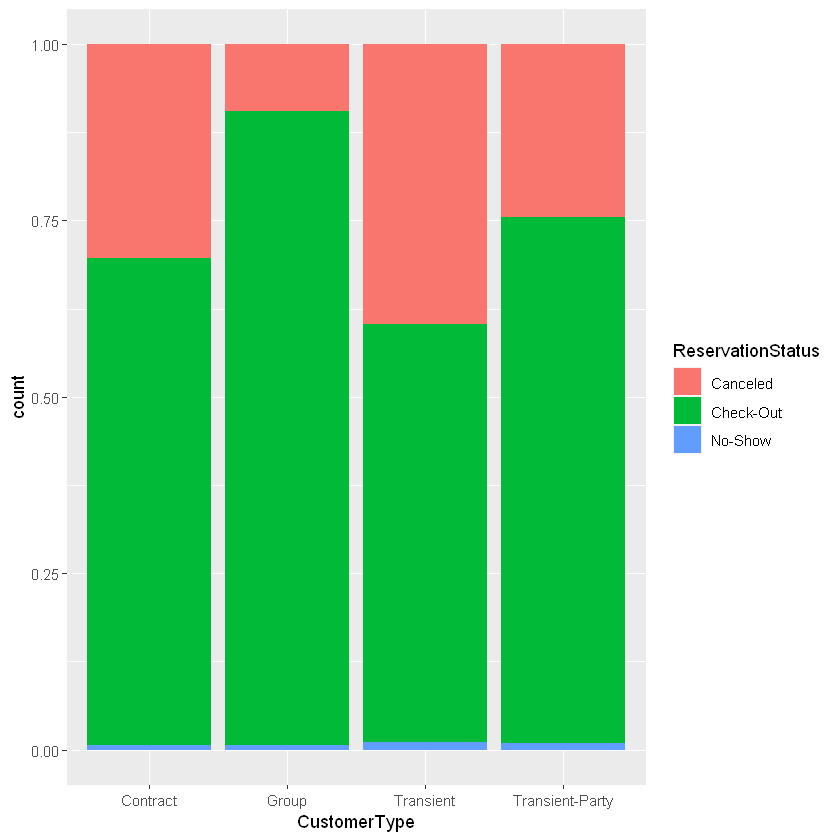

In [67]:
ggplot(data = df, aes(x = CustomerType, fill = ReservationStatus)) + 
geom_bar(stat = "count", position = "fill") 

Warning message:
"Removed 233 rows containing non-finite values (stat_count)."Warning message:
"Removed 3 rows containing missing values (geom_bar)."

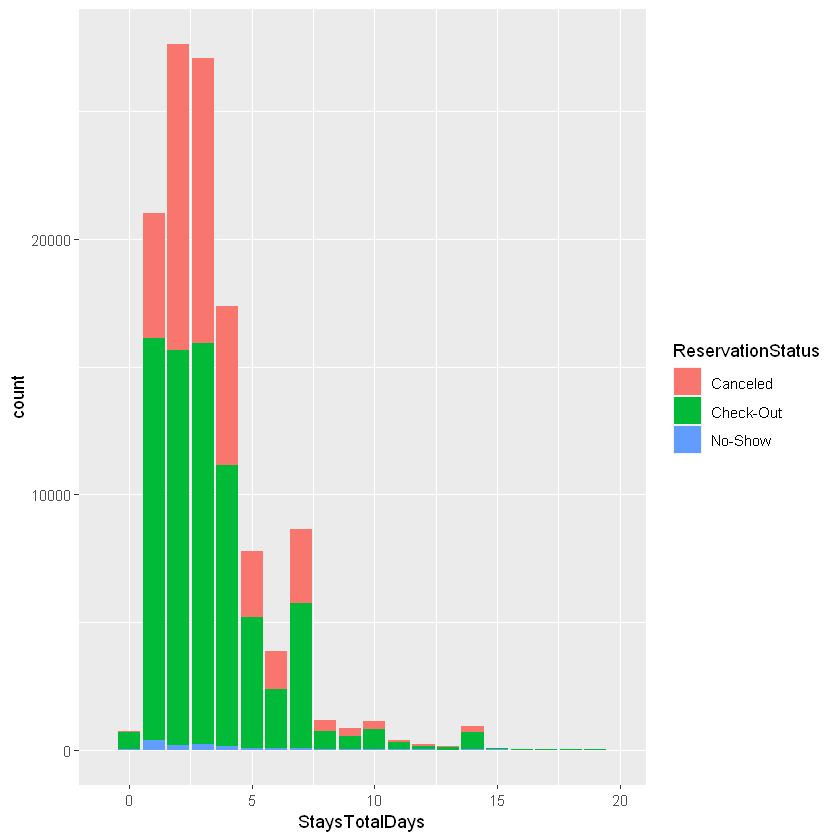

In [68]:
ggplot(data = df, aes(x = StaysTotalDays, fill = ReservationStatus)) + 
geom_bar(stat = "count") + 
xlim(-1,20)

In [84]:
sample <- sample.split(df$IsCanceled, SplitRatio = 0.7)

In [85]:
train <- subset(df, sample == TRUE)
test <-subset(df, sample == FALSE)

In [86]:
model <- glm(IsCanceled ~ LeadTime + 
             Adults + Children + Babies + IsRepeatedGuest + StaysTotalDays + 
             PreviousCancellations + DayName + ArrivalDateYear + ArrivalDateMonth + 
             ArrivalDateWeekNumber + ArrivalDateDayOfMonth +
             ArrivalDateMonth, data = train , family = "binomial")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [90]:
model <- glm(IsCanceled ~ LeadTime + StaysInWeekendNights + StaysInWeekNights + Adults + Babies + IsRepeatedGuest + PreviousCancellations + PreviousBookingsNotCanceled + BookingChanges + RequiredCarParkingSpaces + TotalOfSpecialRequests, data = train , family = "binomial")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [91]:
summary(model)


Call:
glm(formula = IsCanceled ~ LeadTime + StaysInWeekendNights + 
    StaysInWeekNights + Adults + Babies + IsRepeatedGuest + PreviousCancellations + 
    PreviousBookingsNotCanceled + BookingChanges + RequiredCarParkingSpaces + 
    TotalOfSpecialRequests, family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.4904  -0.9024  -0.5486   1.0648   5.9650  

Coefficients:
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -1.082e+00  3.437e-02 -31.490  < 2e-16 ***
LeadTime                     4.515e-03  8.189e-05  55.138  < 2e-16 ***
StaysInWeekendNights        -2.331e-02  9.318e-03  -2.502   0.0124 *  
StaysInWeekNights            2.059e-02  4.921e-03   4.183 2.87e-05 ***
Adults                       2.640e-01  1.737e-02  15.199  < 2e-16 ***
Babies                       1.521e-01  9.835e-02   1.547   0.1219    
IsRepeatedGuest             -1.235e+00  9.480e-02 -13.029  < 2e-16 ***
Previou

In [92]:
model <- step(model)

Start:  AIC=89129.67
IsCanceled ~ LeadTime + StaysInWeekendNights + StaysInWeekNights + 
    Adults + Babies + IsRepeatedGuest + PreviousCancellations + 
    PreviousBookingsNotCanceled + BookingChanges + RequiredCarParkingSpaces + 
    TotalOfSpecialRequests



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                              Df Deviance   AIC
<none>                              89106 89130
- Babies                       1    89108 89130
- StaysInWeekendNights         1    89112 89134
- StaysInWeekNights            1    89123 89145
- IsRepeatedGuest              1    89300 89322
- Adults                       1    89345 89367
- PreviousBookingsNotCanceled  1    89972 89994
- BookingChanges               1    90596 90618
- RequiredCarParkingSpaces     1    92362 92384
- TotalOfSpecialRequests       1    92395 92417
- LeadTime                     1    92400 92422
- PreviousCancellations        1    92621 92643


In [93]:
test$pred <- round(predict(model, test, type ="response"))
table(test$pred, test$IsCanceled)

mean(test$pred == test$IsCanceled, na.rm = TRUE)

   
        0     1
  0 20120  7709
  1  2430  5558

[1] 0.7169221

In [95]:
test$pred <- predict(model, test, type ="response")

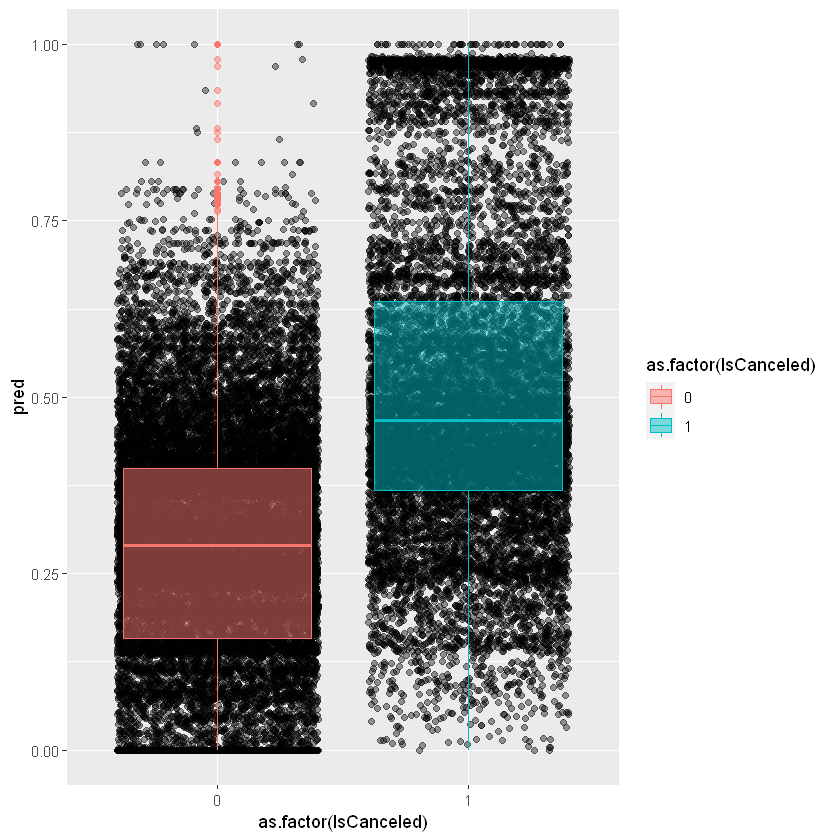

In [97]:
ggplot(data = test , aes( x = as.factor(IsCanceled), y = pred) ) + 
geom_jitter(alpha = 0.4) + 
geom_boxplot(aes(color = as.factor(IsCanceled), fill = as.factor(IsCanceled)), alpha = 0.5)


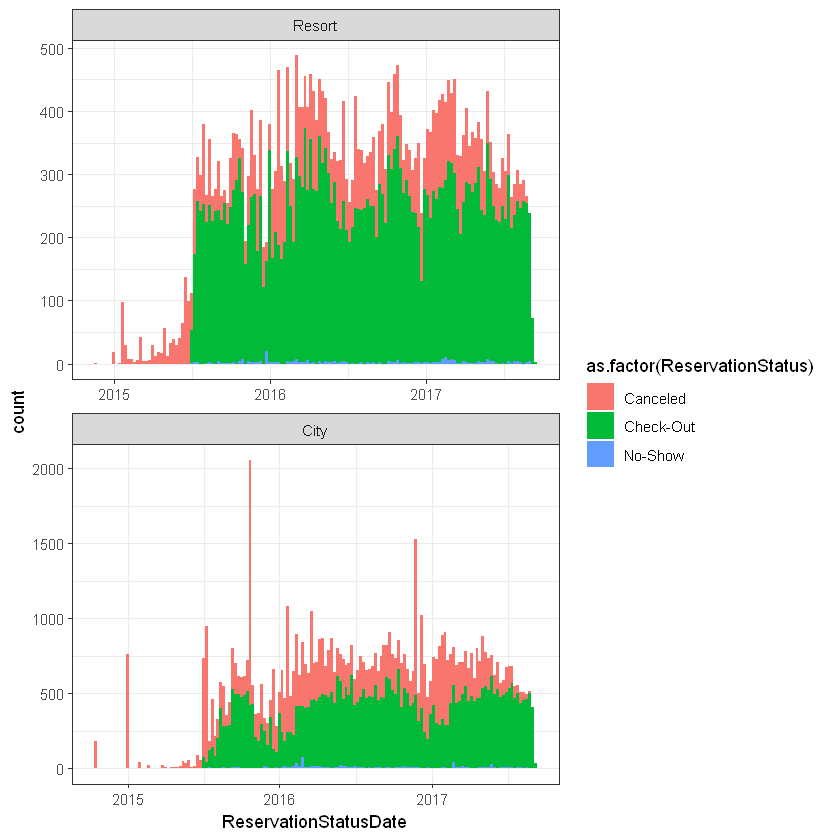

In [98]:
ggplot(data = df, aes(x = ReservationStatusDate)) + 
geom_histogram(binwidth = 7, aes(fill = as.factor(ReservationStatus))) + 
facet_wrap(vars(Location), nrow = 2, scales = "free") + 
theme_bw()

In [99]:
dfdate <- aggregate(df$IsCanceled == 1, by=list(df$ReservationStatusDate), sum)
colnames(dfdate) <- c("Date", "Cancelled")

dfdate2 <- aggregate(df$IsCanceled == 0, by=list(df$ReservationStatusDate), sum)

dfdate2 <- cbind(dfdate, dfdate2[2])

head(dfdate2)

dfdate2$percent <- dfdate2$Cancelled / (dfdate2$Cancelled + dfdate2$x)

,Date,Cancelled,x
,<date>,<int>,<int>
1,2014-10-17,180,0
2,2014-11-18,1,0
3,2015-01-01,763,0
4,2015-01-02,16,0
5,2015-01-18,1,0
6,2015-01-20,2,0


In [100]:
head(dfdate2)

,Date,Cancelled,x,percent
,<date>,<int>,<int>,<dbl>
1,2014-10-17,180,0,1
2,2014-11-18,1,0,1
3,2015-01-01,763,0,1
4,2015-01-02,16,0,1
5,2015-01-18,1,0,1
6,2015-01-20,2,0,1


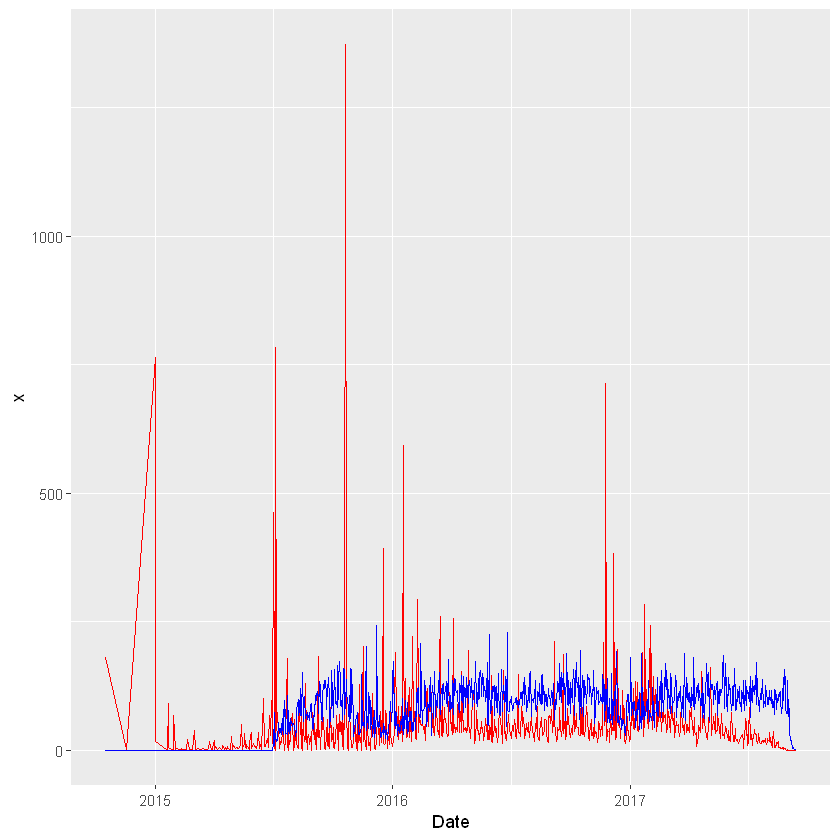

In [101]:
ggplot(data = dfdate2, aes(x = Date, y = x)) + 
geom_line(data = dfdate2, aes(x = Date, y = Cancelled), color = "red") +
geom_line(data = dfdate2, aes(x = Date, y = x), color = "blue")

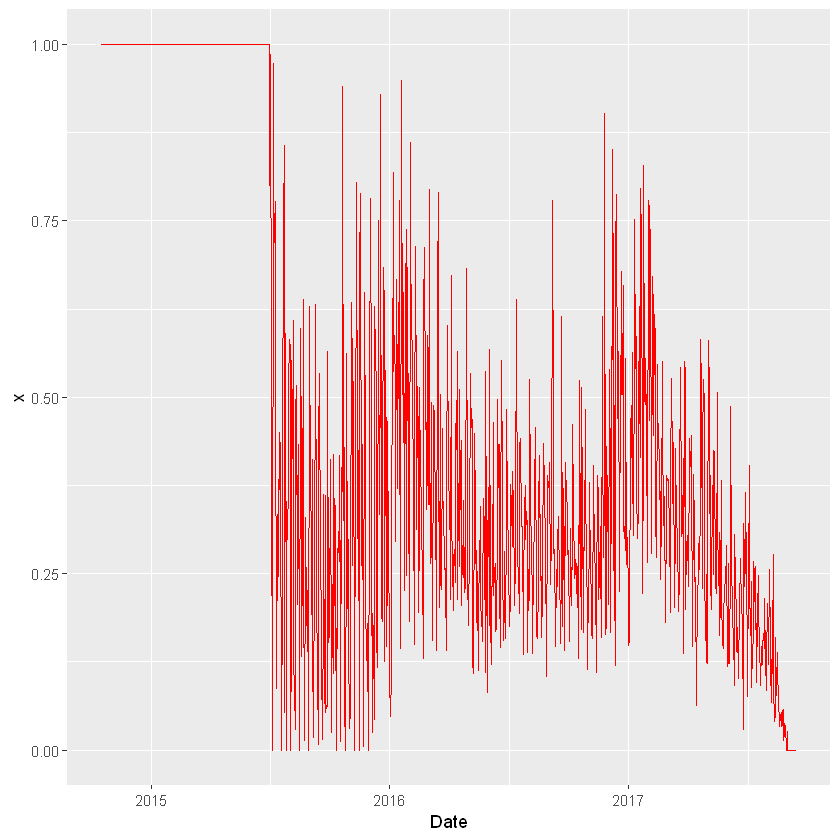

In [102]:
ggplot(data = dfdate2, aes(x = Date, y = x)) + 
geom_line(data = dfdate2, aes(x = Date, y = percent), color = "red") 

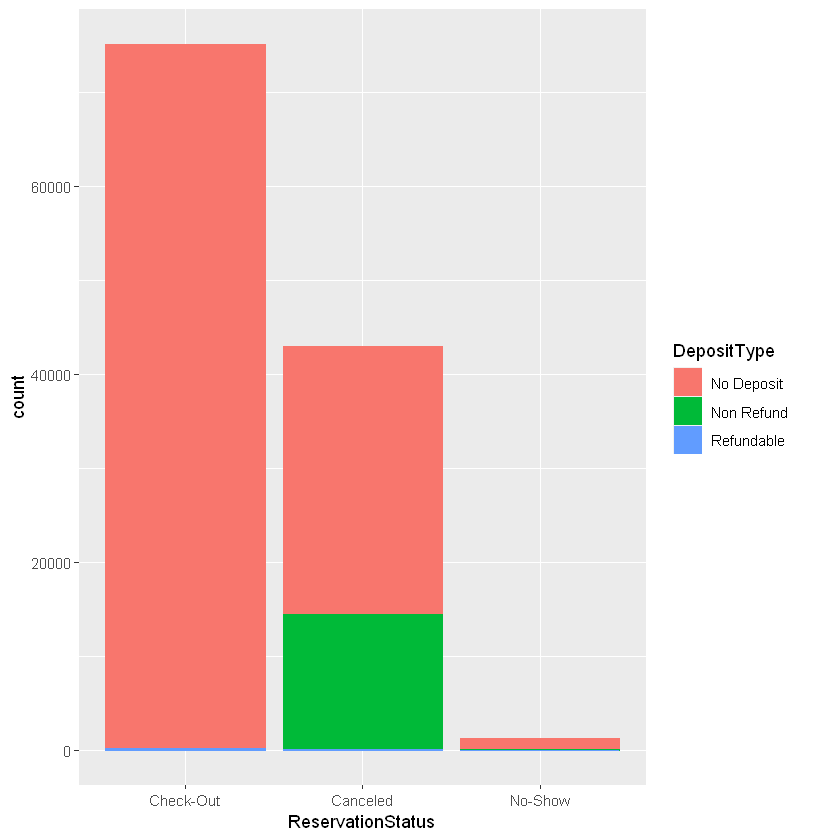

In [103]:
positions <- c("Check-Out", "Canceled", "No-Show")

ggplot(data = df, aes(x = ReservationStatus, 
                      fill = DepositType, 
                      color = DepositType)) + 
geom_bar(stat = "count") + 
scale_x_discrete(limits = positions)

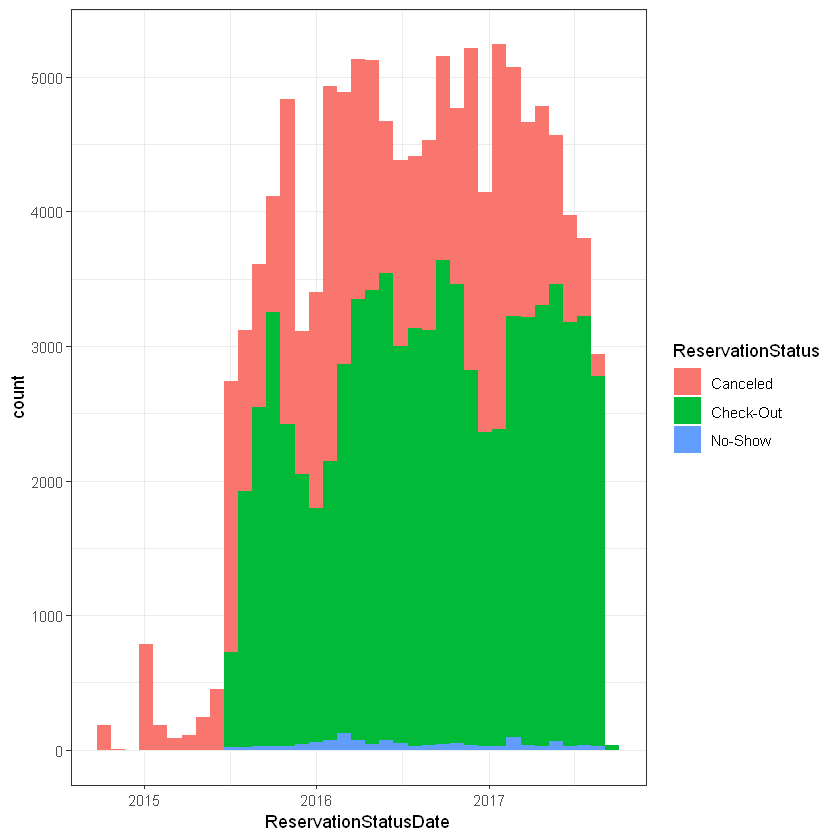

In [104]:
ggplot(data = df, aes(x = ReservationStatusDate, fill = ReservationStatus)) + 
geom_histogram(binwidth = 30, position = "stack") + 
theme_bw()

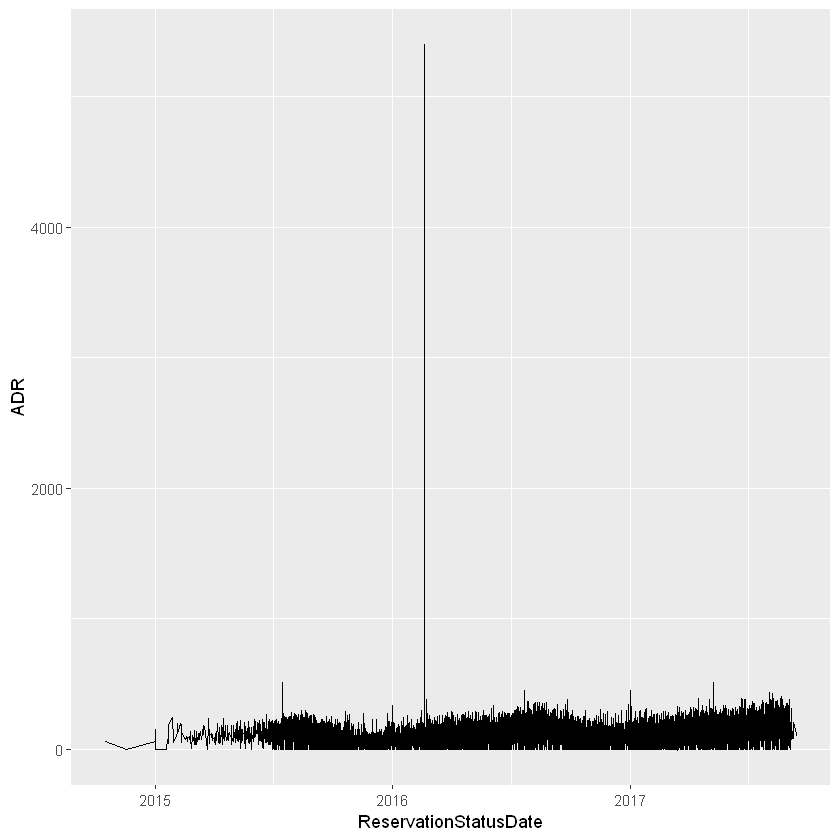

In [105]:
ggplot(data = df, aes(x = ReservationStatusDate, y = ADR)) + 
geom_line()

In [106]:
dfdate <- aggregate(df$ADR, by=list(df$ReservationStatusDate), sum)

In [122]:
#dfdate

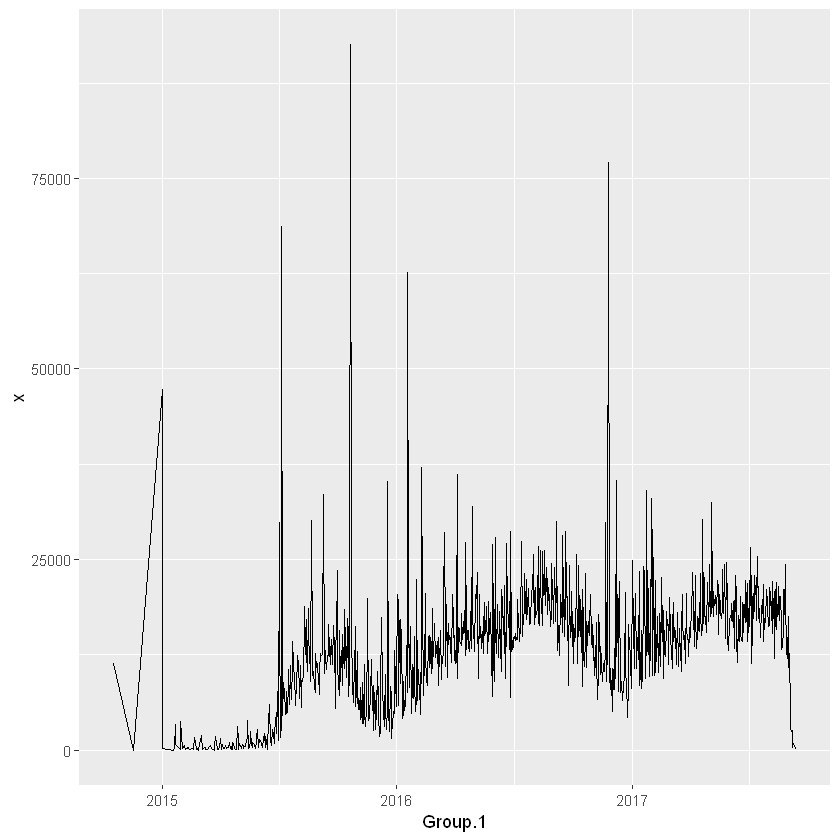

In [108]:
ggplot(data = dfdate, aes(x = Group.1, y = x)) + 
geom_line() 

### Decision Trees

In [37]:
tree <- rpart(IsCanceled ~ LeadTime + ArrivalDateMonth +ArrivalDateWeekNumber +ArrivalDateDayOfMonth +StaysInWeekendNights + StaysInWeekNights+ Adults + Children + Babies +Meal +MarketSegment + DistributionChannel + IsRepeatedGuest + PreviousCancellations + PreviousBookingsNotCanceled + ReservedRoomType + AssignedRoomType + BookingChanges + DepositType  + Company + DaysInWaitingList + CustomerType + ADR + RequiredCarParkingSpaces + TotalOfSpecialRequests  + Location + DayName, data = train, method = "class")
printcp(tree)


Classification tree:
rpart(formula = IsCanceled ~ LeadTime + ArrivalDateMonth + ArrivalDateWeekNumber + 
    ArrivalDateDayOfMonth + StaysInWeekendNights + StaysInWeekNights + 
    Adults + Children + Babies + Meal + MarketSegment + DistributionChannel + 
    IsRepeatedGuest + PreviousCancellations + PreviousBookingsNotCanceled + 
    ReservedRoomType + AssignedRoomType + BookingChanges + DepositType + 
    Company + DaysInWaitingList + CustomerType + ADR + RequiredCarParkingSpaces + 
    TotalOfSpecialRequests + Location + DayName, data = train, 
    method = "class")

Variables actually used in tree construction:
[1] CustomerType             DepositType              LeadTime                
[4] MarketSegment            PreviousCancellations    RequiredCarParkingSpaces
[7] TotalOfSpecialRequests  

Root node error: 30957/83573 = 0.37042

n= 83573 

        CP nsplit rel error  xerror      xstd
1 0.324870      0   1.00000 1.00000 0.0045097
2 0.034491      1   0.67513 0.67513 0.0040441

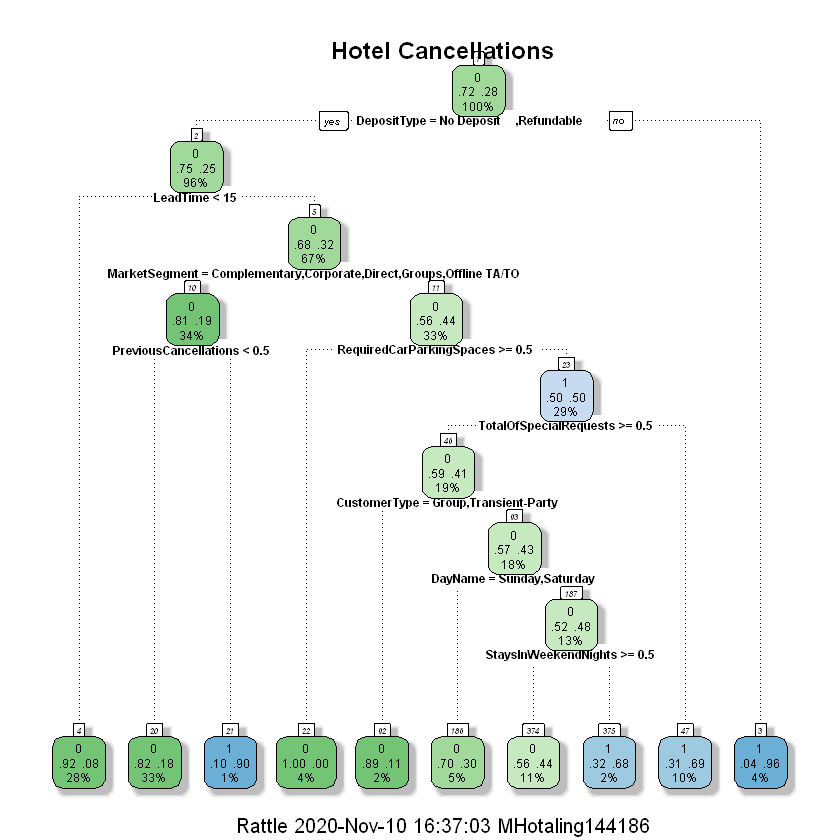

In [110]:
fancyRpartPlot(tree, cex = 0.6, main = "Hotel Cancellations")

In [111]:
tree.pred <- predict(tree, test, type = "class")

In [112]:
table(tree.pred, test$IsCanceled)

         
tree.pred     0     1
        0 20377  4643
        1  2173  8624

In [113]:
mean(tree.pred == test$IsCanceled)

[1] 0.8096993

In [114]:
tree <- rpart(IsCanceled ~ LeadTime + ArrivalDateMonth +
              ArrivalDateWeekNumber +ArrivalDateDayOfMonth +
              StaysInWeekendNights + StaysInWeekNights + 
              Adults + Children + Babies + Meal + 
              MarketSegment + DistributionChannel + 
              IsRepeatedGuest + PreviousCancellations + 
              PreviousBookingsNotCanceled + ReservedRoomType + 
              AssignedRoomType + BookingChanges + DepositType  + 
              Company + DaysInWaitingList + CustomerType + 
              ADR + RequiredCarParkingSpaces + 
              TotalOfSpecialRequests  + Location + 
              DayName, 
              data = subset(df, Location == "City") , 
              method = "class")
printcp(tree)


Classification tree:
rpart(formula = IsCanceled ~ LeadTime + ArrivalDateMonth + ArrivalDateWeekNumber + 
    ArrivalDateDayOfMonth + StaysInWeekendNights + StaysInWeekNights + 
    Adults + Children + Babies + Meal + MarketSegment + DistributionChannel + 
    IsRepeatedGuest + PreviousCancellations + PreviousBookingsNotCanceled + 
    ReservedRoomType + AssignedRoomType + BookingChanges + DepositType + 
    Company + DaysInWaitingList + CustomerType + ADR + RequiredCarParkingSpaces + 
    TotalOfSpecialRequests + Location + DayName, data = subset(df, 
    Location == "City"), method = "class")

Variables actually used in tree construction:
[1] CustomerType           DepositType            LeadTime              
[4] MarketSegment          PreviousCancellations  TotalOfSpecialRequests

Root node error: 33102/79330 = 0.41727

n= 79330 

        CP nsplit rel error  xerror      xstd
1 0.387529      0   1.00000 1.00000 0.0041957
2 0.042022      1   0.61247 0.61247 0.0037113
3 0.025980     

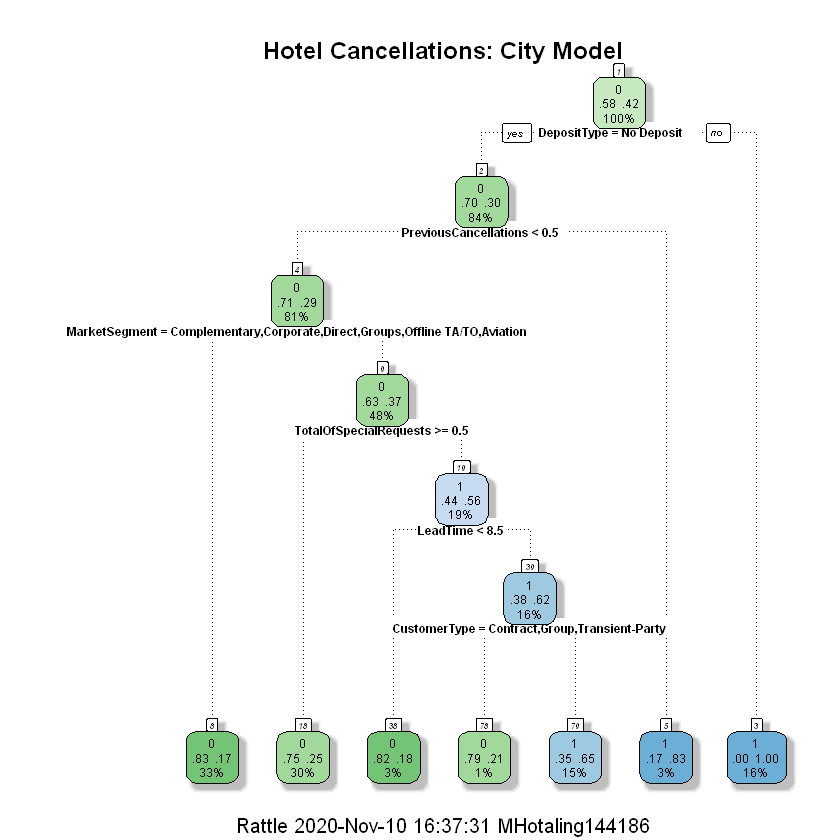

In [115]:
fancyRpartPlot(tree, cex = 0.6, main = "Hotel Cancellations: City Model")

In [116]:
tree.pred <- predict(tree, subset(df, Location == "Resort"), type = "class")

In [117]:
table(tree.pred, subset(df, Location == "Resort")$IsCanceled)

         
tree.pred     0     1
        0 27042  6230
        1  1896  4892

In [118]:
mean(tree.pred == subset(df, Location == "Resort")$IsCanceled)

[1] 0.7971543

In [119]:
tree <- rpart(IsCanceled ~ LeadTime + ArrivalDateMonth +ArrivalDateWeekNumber +ArrivalDateDayOfMonth +StaysInWeekendNights + StaysInWeekNights+ Adults + Children + Babies +Meal +MarketSegment + DistributionChannel + IsRepeatedGuest + PreviousCancellations + PreviousBookingsNotCanceled + ReservedRoomType + AssignedRoomType + BookingChanges + DepositType  + Company + DaysInWaitingList + CustomerType + ADR + RequiredCarParkingSpaces + TotalOfSpecialRequests  + Location + DayName, data = subset(df, Location == "Resort") , method = "class")
printcp(tree)


Classification tree:
rpart(formula = IsCanceled ~ LeadTime + ArrivalDateMonth + ArrivalDateWeekNumber + 
    ArrivalDateDayOfMonth + StaysInWeekendNights + StaysInWeekNights + 
    Adults + Children + Babies + Meal + MarketSegment + DistributionChannel + 
    IsRepeatedGuest + PreviousCancellations + PreviousBookingsNotCanceled + 
    ReservedRoomType + AssignedRoomType + BookingChanges + DepositType + 
    Company + DaysInWaitingList + CustomerType + ADR + RequiredCarParkingSpaces + 
    TotalOfSpecialRequests + Location + DayName, data = subset(df, 
    Location == "Resort"), method = "class")

Variables actually used in tree construction:
[1] CustomerType             DayName                  DepositType             
[4] LeadTime                 MarketSegment            PreviousCancellations   
[7] RequiredCarParkingSpaces StaysInWeekendNights     TotalOfSpecialRequests  

Root node error: 11122/40060 = 0.27763

n= 40060 

        CP nsplit rel error  xerror      xstd
1 0.142151    

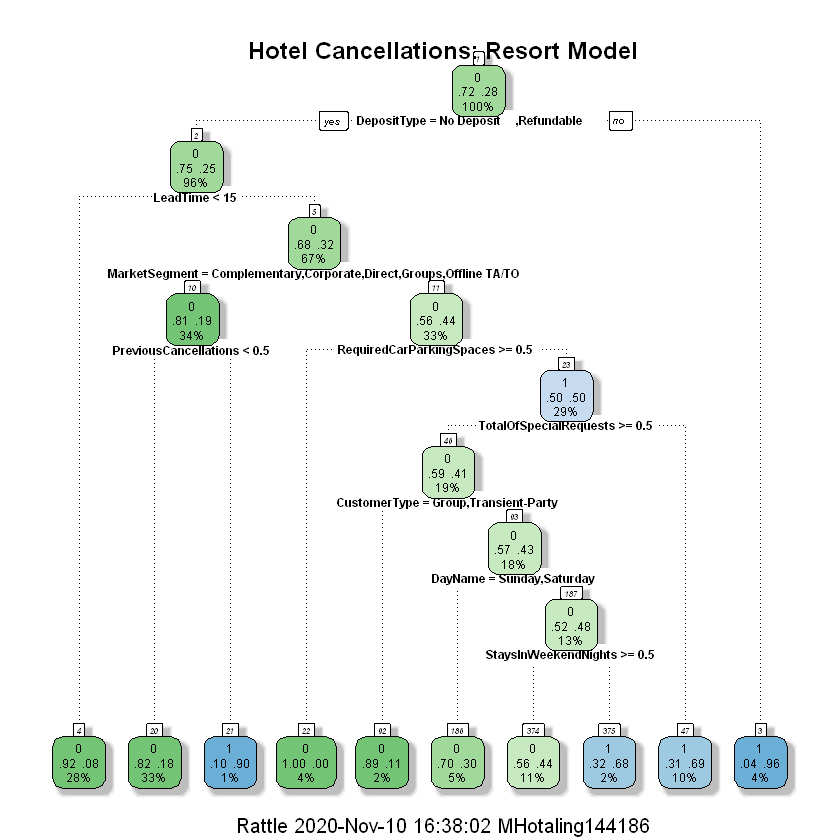

In [120]:
fancyRpartPlot(tree, cex = 0.6, main = "Hotel Cancellations: Resort Model")

In [121]:
tree.pred <- predict(tree, subset(df, Location == "City"), type = "class")
table(tree.pred, subset(df, Location == "City")$IsCanceled)

mean(tree.pred == subset(df, Location == "City")$IsCanceled)

         
tree.pred     0     1
        0 40535  9850
        1  5693 23252

[1] 0.8040716